# Imports

In [190]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
from pandas._libs.tslibs.timedeltas import Timedelta

import ETDataInterface as et
import Classification
importlib.reload(et)
importlib.reload(Classification)

%matplotlib inline

# Model creation and evaluation

In [191]:
TrainDataInterface = et.ETDataInterface()
TrainData = TrainDataInterface.GetDataset()

BinDataInterface = et.ETDataInterface(et.DataSettings(
    dynLin=False,
    dynQuad=False
))
BinData = BinDataInterface.GetDataset()[:600]

MultiDataInterface = et.ETDataInterface(et.DataSettings(
    # removeNaNFeatures=False,
    # envType="static",
    # hideBlink=False
    envType="test"
))
MultiData = MultiDataInterface.GetDataset()[:600]

c:\Users\joste\Personal\Uni\9_Semester\TTK4550_Fordypningsprosjekt\Code\Notebooks\ETDataInterface.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._ts[i].loc[mdIndex:min(mdIndex + self._bw - 1, len(self._ts[i].index))]["Label"] = "BLINK"


# Plot classifications

In [192]:
def generateCoordinatePlot(df, ax):
    df["sampleIndex"] = [i for i in range(len(df["sampleIndex"]))]
    ax.plot(df["sampleIndex"], df.y_rms, 
        marker='o', linestyle='', markersize=5, label="y", c='b')
    ax.plot(df["sampleIndex"], df.x_rms, 
        marker='o', linestyle='', markersize=5, label="x", c='c')
    ax.legend(loc='upper right')
    return ax

def generateLabelsPlot(df, ax, labelDf, labelColName, legend = False):
    labelDf["sampleIndex"] = [i for i in range(len(df["sampleIndex"]))]
    labelGroups = labelDf.groupby(labelColName)
    colorMap = {
        "FIXATION": 'b', 0: 'b', 
        "SACCADE": 'r',  1: 'r', 
        "BLINK": 'g', 
        "SMOOTH": 'y', 2: 'y'
    }
    for name, group in labelGroups:
        if name == "FIXATION" or name == 0:
            it = 0
            for x in group["sampleIndex"]:
                if it == 0:
                    it = 1
                    ax.axvline(x=x, c=colorMap[name], label="FIXATION")
                else: ax.axvline(x=x, c=colorMap[name])
        if name == "SACCADE" or name == 1:
            it = 0
            for x in group["sampleIndex"]:
                if it == 0:
                    it = 1
                    ax.axvline(x=x, c=colorMap[name], label="SACCADE")
                else: ax.axvline(x=x, c=colorMap[name])
        if name == "BLINK":
            it = 0
            for x in group["sampleIndex"]:
                if it == 0:
                    it = 1
                    ax.axvline(x=x, c=colorMap[name], label="BLINK")
                else: ax.axvline(x=x, c=colorMap[name])
        if name == "SMOOTH" or name == 2:
            it = 0
            for x in group["sampleIndex"]:
                if it == 0:
                    it = 1
                    ax.axvline(x=x, c=colorMap[name], label="SMOOTH")
                else: ax.axvline(x=x, c=colorMap[name])

    if legend: ax.legend(loc='upper right')
    return ax

def plotDataset(df, cl1, cl2, cl3):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex='col', gridspec_kw={'height_ratios': [5, 1, 1, 1, 1]})
    fig.set_figheight(10)
    fig.set_figwidth(15)

    ax1 = generateCoordinatePlot(df, ax1)
    ax2 = generateLabelsPlot(df, ax2, df, "Label", legend=True)
    ax3 = generateLabelsPlot(df, ax3, cl1, "y_class")
    ax4 = generateLabelsPlot(df, ax4, cl2, "y_class")
    ax5 = generateLabelsPlot(df, ax5, cl3, "y_class")
    
    plt.subplots_adjust(wspace=0, hspace=0)

    ax5.set_xlabel('Sample index')
    ax1.set_ylabel('RMS coordinates')
    ax2.set_ylabel('GT')
    ax3.set_ylabel('ML-RFC')
    ax4.set_ylabel('IDF')
    ax5.set_ylabel('IVT')
    ax2.set_yticks([])
    ax3.set_yticks([])
    ax4.set_yticks([])
    ax5.set_yticks([])

c:\Users\joste\Personal\Uni\9_Semester\TTK4550_Fordypningsprosjekt\Code\Notebooks\Classification.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data[wnd[0]:wnd[1]]["y_class"] = "FIXATION"


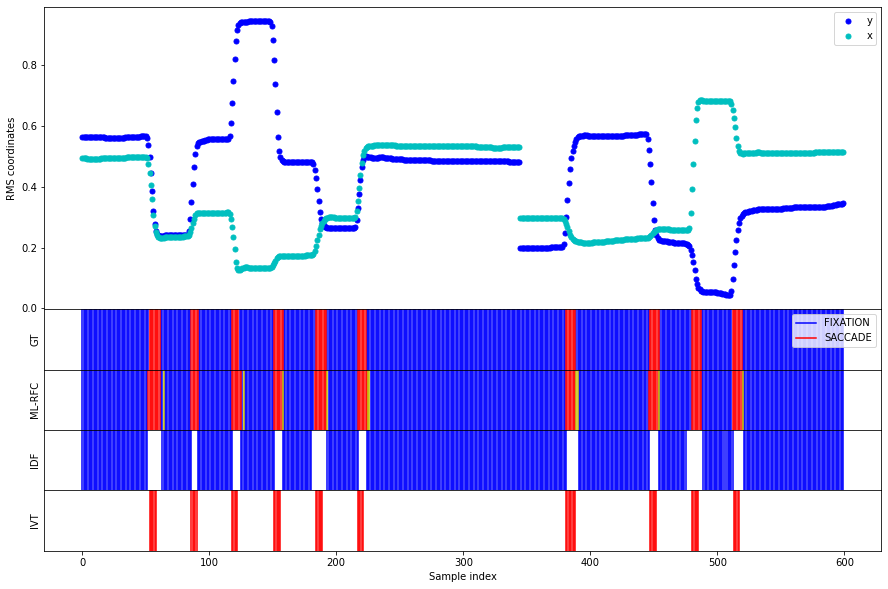

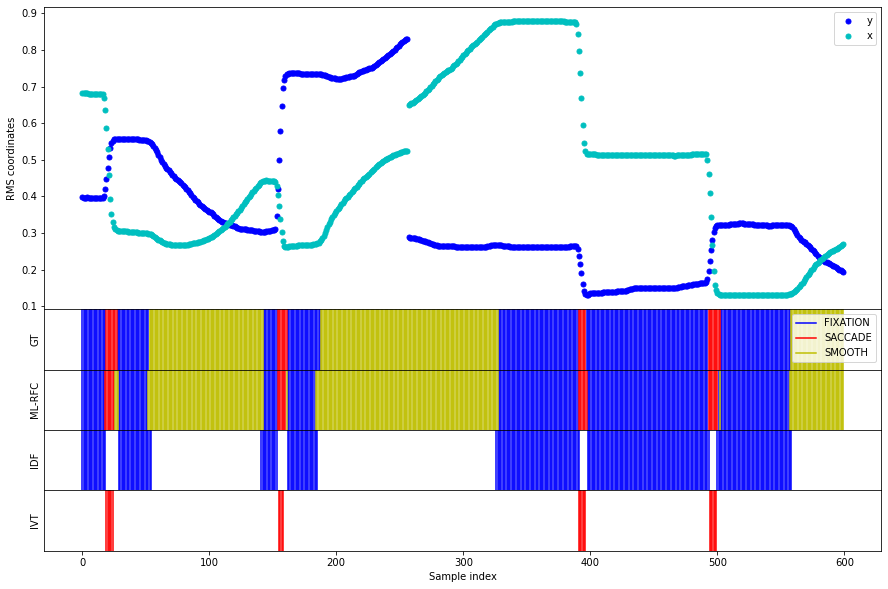

In [193]:
RFCModel = Classification.MLModel(TrainData.copy(), "RFC")
IDFModelBin = Classification.IDFModel(BinData.copy(), 0.005, Timedelta(120, 'milliseconds'))
IVTModelBin = Classification.IVTModel(BinData.copy(), 0.4)
IDFModelMulti = Classification.IDFModel(MultiData.copy(), 0.005, Timedelta(120, 'milliseconds'))
IVTModelMulti = Classification.IVTModel(MultiData.copy(), 0.4)
RFCModel.Train()

IDFClassificationsBin = IDFModelBin.GetClassifications()
IVTClassificationsBin = IVTModelBin.GetClassifications()
RFCClassificationsBin = RFCModel.GetClassifications(BinData.copy())
IDFClassificationsMulti = IDFModelMulti.GetClassifications()
IVTClassificationsMulti = IVTModelMulti.GetClassifications()
RFCClassificationsMulti = RFCModel.GetClassifications(MultiData.copy())

plotDataset(BinData.copy(), RFCClassificationsBin, IDFClassificationsBin, IVTClassificationsBin)
plotDataset(MultiData.copy(), RFCClassificationsMulti, IDFClassificationsMulti, IVTClassificationsMulti)

Model Performance metrics:
             	ROC AUC: 		0.99				[0.0,1.0]
             	Balanced accuracy: 	0.96				[0.0,1.0]
             	Cohen Kappa: 		0.94				[-1.0,1.0]
             	Precision score: 	Fi: 0.97, Sa: 0.96, Sm: 0.95	[-1.0,1.0]
             	Recall score: 		Fi: 0.96, Sa: 0.96, Sm: 0.97	[-1.0,1.0]
             
              precision    recall  f1-score   support

    FIXATION       0.97      0.96      0.97       116
     SACCADE       0.96      0.96      0.96        25
      SMOOTH       0.95      0.97      0.96       103

    accuracy                           0.96       244
   macro avg       0.96      0.96      0.96       244
weighted avg       0.96      0.96      0.96       244



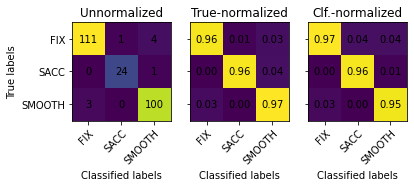

In [194]:
RFCModel.ShowMultiModelPerformance()

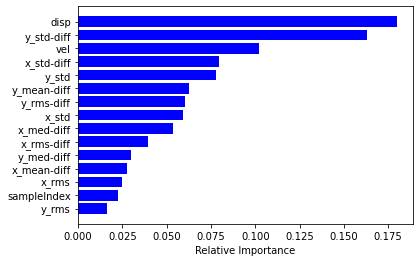

In [195]:
RFCModel.PlotFeatureImportances()